# Análisis del dataset de Daylio

In [482]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [483]:
df1 = pd.read_csv('./csv_files/ene1_jun25.csv')
df2 = pd.read_csv('./csv_files/ago10_dic25.csv')

In [484]:
df1.head()

,full_date,date,weekday,time,mood,activities,note_title,note
0,2024-06-25,June 25,Tuesday,10:18 AM,Bien,Feliz | Relajado | Contento | Cansado | Ocupad...,NaN,NaN
1,2024-06-24,June 24,Monday,8:00 PM,Bien,Contento | Ocupado | Confundido | Buen sueño |...,NaN,NaN
2,2024-06-23,June 23,Sunday,8:00 PM,Bien,Feliz | Relajado | Contento | Motivado | Produ...,NaN,NaN
3,2024-06-22,June 22,Saturday,8:00 PM,Bien,Feliz | Relajado | Contento | Cansado | Motiva...,NaN,NaN
4,2024-06-21,June 21,Friday,8:00 PM,Bien,Relajado | Contento | Ansioso | Decepcionado |...,NaN,NaN


In [485]:
df2.head()

,full_date,date,weekday,time,mood,activities,note_title,note
0,2024-12-25,25 Dec,Wednesday,10:45 p.m.,Mal,Sueño malo | Cansado | Ansioso | Estresado | D...,NaN,NaN
1,2024-12-24,24 Dec,Tuesday,10:45 p.m.,Mal,Sueño malo | Relajado | Contento | Pensativo |...,NaN,NaN
2,2024-12-23,23 Dec,Monday,11:23 p.m.,Mal,Buen sueño | Relajado | Contento | Ansioso | E...,NaN,NaN
3,2024-12-22,22 Dec,Sunday,10:45 p.m.,Bien,Buen sueño | Feliz | Relajado | Contento | Pro...,NaN,NaN
4,2024-12-21,21 Dec,Saturday,11:15 p.m.,Increíble,Buen sueño | Feliz | Emocionado | Contento | C...,NaN,NaN


Como primeros pasos antes de comenzar el análisis, vamos a arreglar los DataFrames, ya que vienen en formatos diferente para el caso de `time` y `date`, y no necesitamos las columnas `note_title` ni `note`.

In [486]:
df1 = df1.drop(columns=['date', 'note_title', 'note'])
df2 = df2.drop(columns=['date', 'note_title', 'note'])

In [487]:
# Convertir el formato de 'time' en df2 al formato AM - PM

df2['time'] = df2['time'].str.replace(r'\.m\.', 'M', regex=True).str.replace(r'a', 'A', regex=True).str.replace(r'p', 'P', regex=True)

In [488]:
# Por defecto axis=0
df = pd.concat([df2, df1])

In [489]:
df.head()

,full_date,weekday,time,mood,activities
0,2024-12-25,Wednesday,10:45 PM,Mal,Sueño malo | Cansado | Ansioso | Estresado | D...
1,2024-12-24,Tuesday,10:45 PM,Mal,Sueño malo | Relajado | Contento | Pensativo |...
2,2024-12-23,Monday,11:23 PM,Mal,Buen sueño | Relajado | Contento | Ansioso | E...
3,2024-12-22,Sunday,10:45 PM,Bien,Buen sueño | Feliz | Relajado | Contento | Pro...
4,2024-12-21,Saturday,11:15 PM,Increíble,Buen sueño | Feliz | Emocionado | Contento | C...


In [490]:
df.tail()

,full_date,weekday,time,mood,activities
172,2024-01-05,Friday,7:14 PM,Bien,Cansado | Aburrido | Ansioso | Sueño medio | E...
173,2024-01-04,Thursday,9:36 PM,Bien,Feliz | Relajado | Buen sueño | Ejercicio | Co...
174,2024-01-03,Wednesday,7:26 PM,Bien,Feliz | Contento | Buen sueño | Ejercicio | Ag...
175,2024-01-02,Tuesday,8:17 PM,Bien,Feliz | Relajado | Contento | Sueño medio | Ej...
176,2024-01-01,Monday,1:56 PM,Meh,Relajado | Aburrido | Sueño medio


In [491]:
df.describe()

,full_date,weekday,time,mood,activities
count,294,294,294,294,294
unique,294,7,186,5,294
top,2024-12-25,Tuesday,10:45 PM,Bien,Sueño malo | Cansado | Ansioso | Estresado | D...
freq,1,43,27,221,1


In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 176
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   full_date   294 non-null    object
 1   weekday     294 non-null    object
 2   time        294 non-null    object
 3   mood        294 non-null    object
 4   activities  294 non-null    object
dtypes: object(5)
memory usage: 13.8+ KB


### Estadísticas y visualizaciones anules, mensuales y semanales

In [493]:
import calendar
import locale

locale.setlocale(locale.LC_TIME, 'es_MX.UTF-8')

# Asignar un color a cada tipo de emoción
mood_data = {
    'Horrible': 'crimson',
    'Mal': 'orange',
    'Meh': 'skyblue',
    'Bien': 'limegreen',
    'Increíble': 'turquoise'
}

# Convertir full_date a tipo datetime para extraer fácilmente el mes
df['full_date'] = pd.to_datetime(df['full_date'], errors='coerce')

# Extraer el mes y el año de la fecha
df['month'] = df['full_date'].dt.month

moods_sorted = list(mood_data.keys())

# Columna para ordenar moods (1: Terrible a 5: Increíble)
mapped_order = {mood: i for i, mood in enumerate(moods_sorted, start=1)}
df['mood_numeric'] = df['mood'].map(mapped_order)

df['colors'] = df['mood'].map(mood_data)

In [494]:
x = df['full_date']
y = df['mood_numeric']

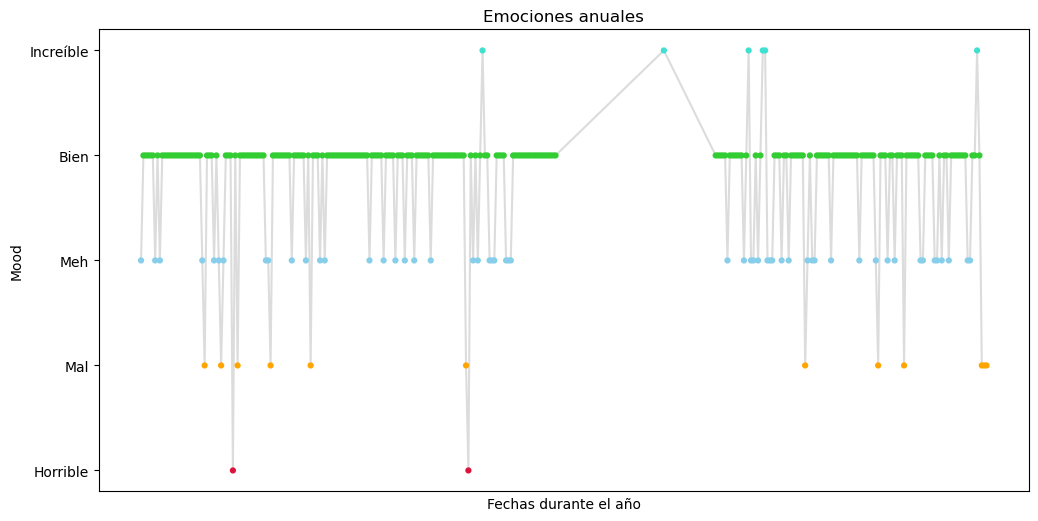

In [495]:
plt.figure(figsize=(12, 6))

plt.plot(x, y, c='gainsboro', zorder=1)
plt.scatter(x, y, c=df['colors'], s=12, zorder=2)

plt.xlabel("Fechas durante el año")
plt.ylabel("Mood")
plt.yticks(ticks=range(1, len(mood_data) + 1), labels=moods_sorted)  # Reemplazar números por categorías originales
plt.xticks([])  # Ocultar etiquetas del eje X

plt.title("Emociones anuales")

plt.show()

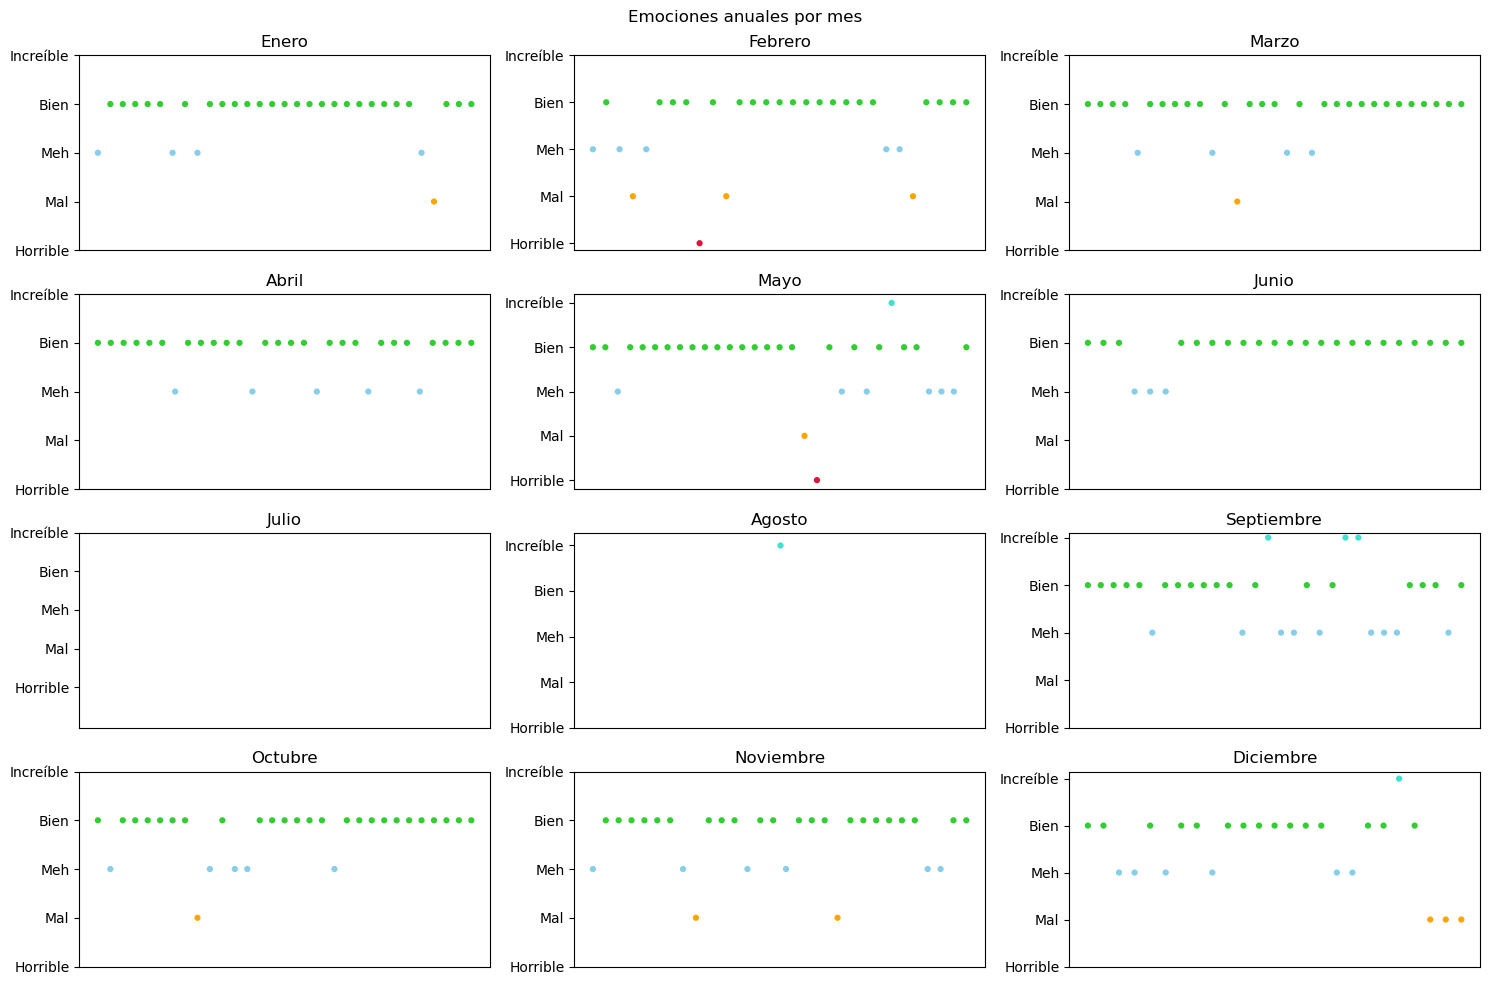

In [496]:
fig, axes = plt.subplots(4, 3, figsize=(15, 10))

axes = axes.flatten()

for month in range(1, 13):
    ax = axes[month - 1]  # Seleccionar el subgráfico correspondiente
    df_month = df[df['month'] == month]  # Filtrar los datos del mes actual

    ax.scatter(df_month['full_date'], df_month['mood_numeric'], c=df_month['colors'], s=12)

    ax.set_title(f'{calendar.month_name[month].capitalize()}')
    ax.set_yticks(range(1, len(mood_data) + 1))  # Reemplazar números por las categorías originales
    ax.set_yticklabels(moods_sorted)
    ax.set_xticks([])

fig.suptitle("Emociones anuales por mes")
plt.tight_layout()

plt.show()

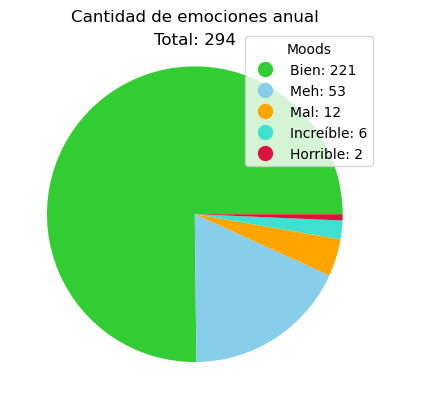

In [497]:
suma_moods = df['mood'].value_counts()
moods = suma_moods.index

colors = [mood_data[mood] for mood in moods]

plt.pie(
    suma_moods, 
    labels=moods,
    colors=colors,
    textprops=dict(color="w")
)

handles = [plt.Line2D([0], [0], marker='o', color=color, markersize=10, linestyle='') 
           for color in colors]
labels = [f"{mood}: {suma_moods[mood]}" for mood in moods]
plt.legend(handles, labels, title="Moods", loc='upper right')

plt.title("Cantidad de emociones anual")
plt.text(0, 1.15, f'Total: {df.shape[0]}', ha='center', fontsize=12)

plt.show()

In [498]:
df.head()

,full_date,weekday,time,mood,activities,month,mood_numeric,colors
0,2024-12-25,Wednesday,10:45 PM,Mal,Sueño malo | Cansado | Ansioso | Estresado | D...,12,2,orange
1,2024-12-24,Tuesday,10:45 PM,Mal,Sueño malo | Relajado | Contento | Pensativo |...,12,2,orange
2,2024-12-23,Monday,11:23 PM,Mal,Buen sueño | Relajado | Contento | Ansioso | E...,12,2,orange
3,2024-12-22,Sunday,10:45 PM,Bien,Buen sueño | Feliz | Relajado | Contento | Pro...,12,4,limegreen
4,2024-12-21,Saturday,11:15 PM,Increíble,Buen sueño | Feliz | Emocionado | Contento | C...,12,5,turquoise


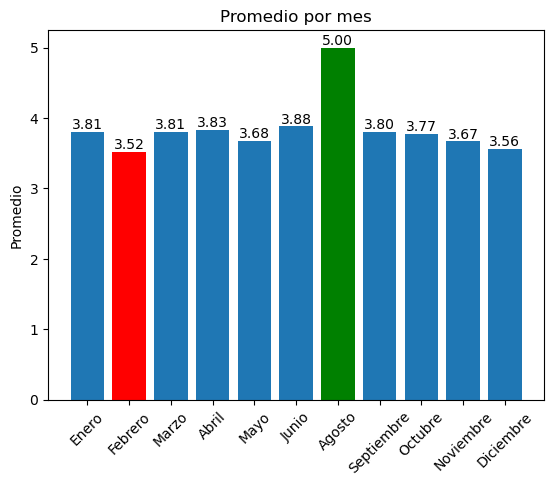

In [499]:
mean_month = df.groupby('month')['mood_numeric'].mean()

max_value = mean_month.max()
min_value = mean_month.min()

max_index = mean_month.idxmax()
min_index = mean_month.idxmin()

colors = ['green' if i == max_index else 'red' if i == min_index else 'C0' for i in mean_month.index]

bars = plt.bar([calendar.month_name[i].capitalize() for i in mean_month.index], mean_month.values, color=colors)

plt.bar_label(bars, labels=[f'{val:.2f}' for val in mean_month.values])

plt.ylabel('Promedio')
plt.title('Promedio por mes')
plt.xticks(rotation=45)
plt.show()

Para las estadísticas mensuales, y en general, se tiene que considerar que __no hay datos del mes de julio__ y __sólo uno en el mes de agosto__.

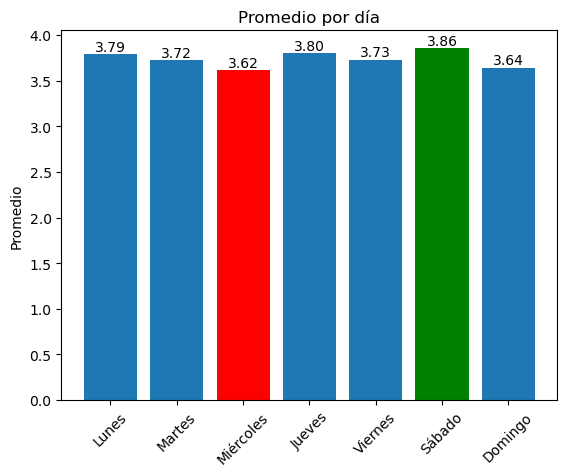

In [500]:
mean_weekday = df.groupby('weekday')['mood_numeric'].mean()

days_translation = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

mean_weekday.index = mean_weekday.index.map(days_translation)

days_order = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

mean_weekday = mean_weekday.reindex(days_order)  # Reordenar días

max_value = mean_weekday.max()
min_value = mean_weekday.min()

max_index = mean_weekday.idxmax()
min_index = mean_weekday.idxmin()

colors = ['green' if i == max_index else 'red' if i == min_index else 'C0' for i in mean_weekday.index]

bars = plt.bar(mean_weekday.index, mean_weekday.values, color=colors)

plt.bar_label(bars, labels=[f'{val:.2f}' for val in mean_weekday.values])

plt.ylabel('Promedio')
plt.title('Promedio por día')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Actividades

activities = set()
df['activities'].str.split('|').apply(lambda x: activities.update([activity.strip() for activity in x]))
activities = list(activities)
activities